My First Notebook


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Polynomia

In [13]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([11345.10,11818.17,11681.09,11672.19,11623.61,11525.14,11537.44,11754.39,12900.47
])

In [21]:
linreg = LinearRegression()

In [19]:
x = x.reshape(-1,1)

In [22]:
linreg.fit(x,y)

LinearRegression()

In [23]:
y_pred = linreg.predict(x)

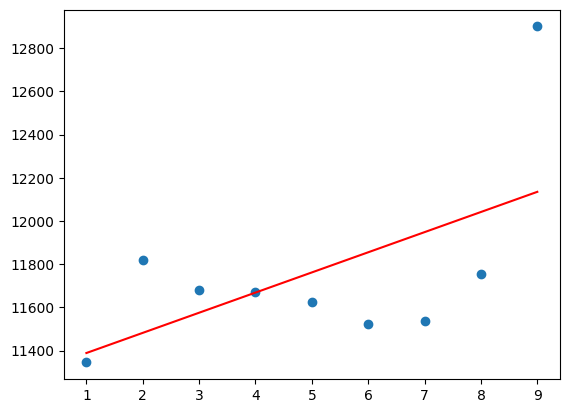

In [24]:
plt.scatter(x,y)
plt.plot(x,y_pred, color="red")